## Stock prices analysis of the top technology companies 
One of the aims of this project is to analyse the stock data of some of the top technology companies (i.e., Alphabet, Amazon, Meta and Apple) between 1 Jan 2020 to 31 Mar 2022, and to explore the factors influencing their closing prices. To do so, in this notebook, I will be:
1. Importing stock prices of the companies from the Tiingo Daily reader API
2. Previewing the database of stock prices
3. Looking at the percentage changes between daily opening and closing stock prices by companies
3. Looking at the changes and factors impacting their closing stock prices
4. Looking at the correlation of closing stock prices between companies

## Part 1: Load the Data
I first import the required packages for analysis.

In [22]:
## IMPORT PACKAGES ##
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

I import stock price data of the selected companies from the Tiingo Daily reader API.

In [23]:
api_key='36ffbd2f82ec5b7450c24ca7c4e2edf8301f404b'

tickers = ['META', 'AAPL', 'AMZN', 'GOOG']
start="2020-1-01"
end="2022-03-31"

df_from_api = pdr.tiingo.TiingoDailyReader(tickers, start=start, end=end, api_key=api_key)

df = df_from_api.read()

df.to_csv('tech-stock-data.csv')

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_12923/2278975209.py:10: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = df_from_api.read()


## Part 2: Preview the data
I preview the data by looking at the first 5 rows of the dataframe.

In [24]:
df.head(5)

close    high     low    open    volume  \
symbol date                                                                  
META   2020-01-02 00:00:00+00:00  209.78  209.79  206.27  206.75  12090707   
       2020-01-03 00:00:00+00:00  208.67  210.40  206.95  207.21  11197416   
       2020-01-06 00:00:00+00:00  212.60  212.78  206.52  206.70  17073861   
       2020-01-07 00:00:00+00:00  213.06  214.58  211.75  212.82  15111857   
       2020-01-08 00:00:00+00:00  215.22  216.24  212.61  213.00  13492703   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
META   2020-01-02 00:00:00+00:00    209.78   209.79  206.27   206.75   
       2020-01-03 00:00:00+00:00    208.67   210.40  206.95   207.21   
       2020-01-06 00:00:00+00:00    212.60   212.78  206.52   206.70   
       2020-01-07 00:00:00+00:00    213.06   214.58  211.75   212.82   
       2020-01-08 00:00:00+00:00    215.22   216.24  212.61   213.00   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
META   2020-01-02 00:00:00+00:00   12090707      0.0          1.0  
       2020-01-03 00:00:00+00:00   11197416      0.0          1.0  
       2020-01-06 00:00:00+00:00   17073861      0.0          1.0  
       2020-01-07 00:00:00+00:00   15111857      0.0          1.0  
       2020-01-08 00:00:00+00:00   13492703      0.0          1.0

I then look at the summary statistics of the dataframe. 

In [25]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,2268.000000,2268.000000,2268.000000,2268.000000,2.268000e+03,2268.000000,2268.000000,2268.000000,2268.000000,2.268000e+03,2268.000000,2268.000000
mean,1391.553708,1407.796634,1374.925087,1391.522465,2.786910e+07,162.816840,164.834355,160.722449,162.765792,6.437231e+07,0.001631,1.001323
std,1266.442397,1280.816250,1252.391458,1267.344005,4.003137e+07,76.880808,77.858364,75.923727,76.898454,5.413639e+07,0.031218,0.062994
min,106.840000,110.190000,103.100000,104.540000,3.467530e+05,52.831000,53.566000,50.676800,52.825500,6.702033e+06,0.000000,1.000000
25%,236.532500,240.625000,232.240000,237.560000,2.435595e+06,112.898316,113.940107,110.997064,112.658281,2.410140e+07,0.000000,1.000000
50%,781.355000,793.230000,756.933000,785.650000,9.098269e+06,147.167613,148.567547,145.520985,147.176085,4.978241e+07,0.000000,1.000000
75%,2739.122500,2768.677500,2712.035000,2740.077500,3.346482e+07,177.717776,179.622125,176.257997,177.848226,8.862149e+07,0.000000,1.000000
max,3731.410000,3773.078200,3696.792900,3744.000000,3.326072e+08,382.180000,384.330000,378.810000,381.680000,4.268849e+08,0.820000,4.000000


Lastly, I check whether there are null values in the dataframe.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2268 entries, ('META', Timestamp('2020-01-02 00:00:00+0000', tz='UTC')) to ('GOOG', Timestamp('2022-03-31 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        2268 non-null   float64
 1   high         2268 non-null   float64
 2   low          2268 non-null   float64
 3   open         2268 non-null   float64
 4   volume       2268 non-null   int64  
 5   adjClose     2268 non-null   float64
 6   adjHigh      2268 non-null   float64
 7   adjLow       2268 non-null   float64
 8   adjOpen      2268 non-null   float64
 9   adjVolume    2268 non-null   int64  
 10  divCash      2268 non-null   float64
 11  splitFactor  2268 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 240.2+ KB


There are no null values, therefore we can proceed with the current dataset.

## Part 3: Daily percentage changes in stock prices
I calculate the daily percentage changes in stock prices of the technology companies.

I first by creating a seperate dataframe for each stock.

In [27]:
meta = df.loc[['META']].droplevel(0)
aapl = df.loc[['AAPL']].droplevel(0)
amzn = df.loc[['AMZN']].droplevel(0)
goog = df.loc[['GOOG']].droplevel(0)

To calculate the daily percentage changes, I added a new column to the company-specific dataframes I made above.

In [28]:
meta['META_pctchange'] = (meta['close'] - meta['open'])/meta['close']
aapl['AAPL_pctchange'] = (aapl['close'] - aapl['open'])/aapl['close']
amzn['AMZN_pctchange'] = (amzn['close'] - amzn['open'])/amzn['close']
goog['GOOG_pctchange'] = (goog['close'] - goog['open'])/goog['close']

Following that, I plot the percentage changes in different histograms.

Text(0.5, 0.98, 'Distribution of percentages changes in stock prices of top technology companies')

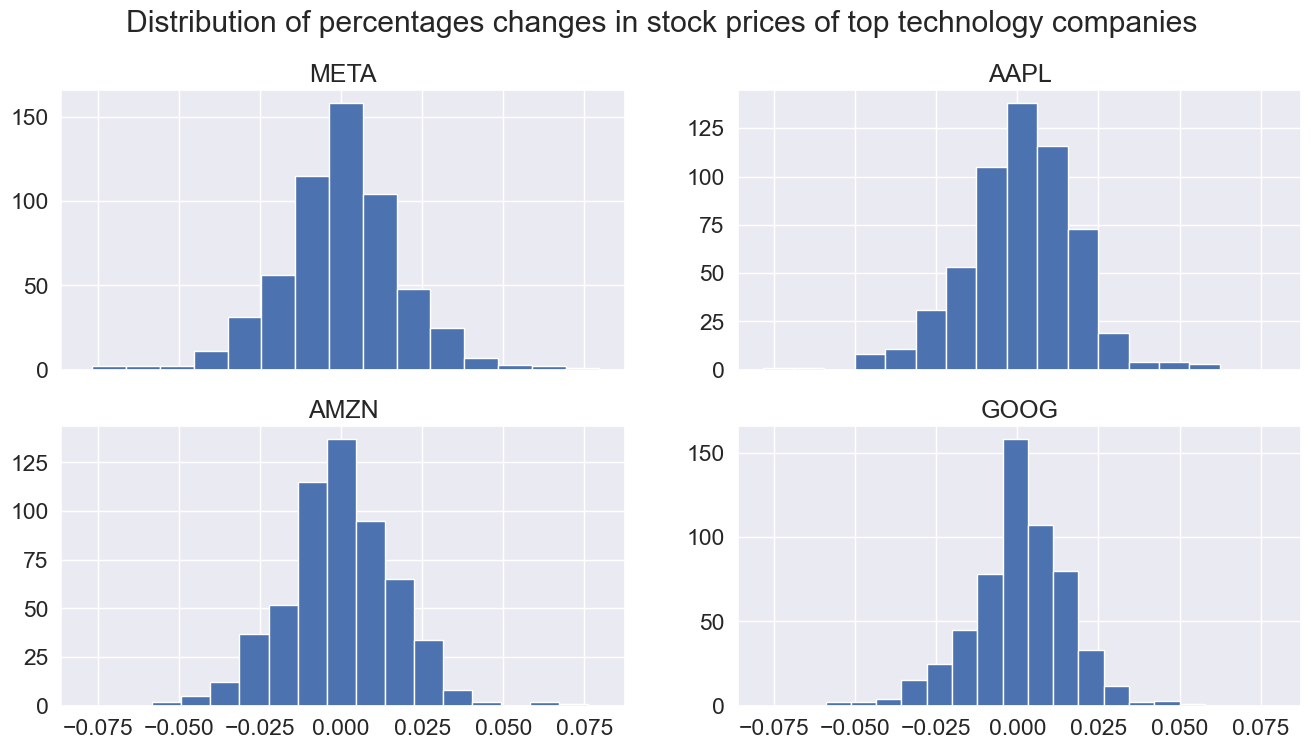

In [29]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,8))

meta['META_pctchange'].hist(bins=15, ax=axes[0, 0])
axes[0,0].set_title('META')

aapl['AAPL_pctchange'].hist(bins=15, ax=axes[0, 1])
axes[0,1].set_title('AAPL')

amzn['AMZN_pctchange'].hist(bins=15, ax=axes[1, 0])
axes[1,0].set_title('AMZN')

goog['GOOG_pctchange'].hist(bins=15, ax=axes[1, 1])
axes[1,1].set_title('GOOG')

fig.suptitle('Distribution of percentages changes in stock prices of top technology companies')

All percentage changes are generally normally distributed. 

However, the distribution of META and AMZN show a slight negative skew suggesting that the stock prices were more likely to decrease than increase in a daily basis. 

Contrastingly, there was a positive skew for AAPL and GOOG which implied that the stock prices were more likely to show daily increases.

## Part 4: Analyse the closing prices of the top technology companies

First, we create a seperate dataframe of the companies' closing stock prices.

In [30]:
# creating a `closing prices` dataframe to concatanate the closing prices all companies
meta = meta.rename(columns={'close':'META_close'})
aapl = aapl.rename(columns={'close':'AAPL_close'})
amzn = amzn.rename(columns={'close':'AMZN_close'})
goog = goog.rename(columns={'close':'GOOG_close'})
closingprices = pd.concat([meta['META_close'], aapl['AAPL_close'], amzn['AMZN_close'], goog['GOOG_close']], axis=1)
closingprices

,META_close,AAPL_close,AMZN_close,GOOG_close
date,,,,
2020-01-02 00:00:00+00:00,209.78,300.35,1898.01,1367.37
2020-01-03 00:00:00+00:00,208.67,297.43,1874.97,1360.66
2020-01-06 00:00:00+00:00,212.60,299.80,1902.88,1394.21
2020-01-07 00:00:00+00:00,213.06,298.39,1906.86,1393.34
2020-01-08 00:00:00+00:00,215.22,303.19,1891.97,1404.32
...,...,...,...,...
2022-03-25 00:00:00+00:00,221.82,174.72,3295.47,2830.43
2022-03-28 00:00:00+00:00,223.59,175.60,3379.81,2839.00
2022-03-29 00:00:00+00:00,229.86,178.96,3386.30,2865.00


I then look into each company's magnitude of change in closing prices during 1 Jan 2020 to 31 Mar 2022.

In [31]:
closingprices_pctchange = (((closingprices.iloc[566]-closingprices.iloc[0])/closingprices.iloc[0])*100).round(2)
closingprices_pctchange['Average'] = np.mean(closingprices_pctchange)

print("The percentage changes of the technology companies from 1 Jan 2020 to 31 Mar 2022 (%):")
closingprices_pctchange.rename({'META_close':'META', 
                                'AAPL_close':'AAPL',
                                'AMZN_close':'AMZN',
                                'GOOG_close':'GOOG',})

The percentage changes of the technology companies from 1 Jan 2020 to 31 Mar 2022 (%):


META         6.00
AAPL       -41.86
AMZN        71.76
GOOG       104.26
Average     35.04
dtype: float64

To better visualise the negative change in stock prices, I plot a line chart showing the changes of stock closing prices of the companies from 2020 Q1 to 2022 Q1.

Text(0.5, 1.0, 'Closing prices of top technology companies from 2020 Q1 to 2022 Q1')

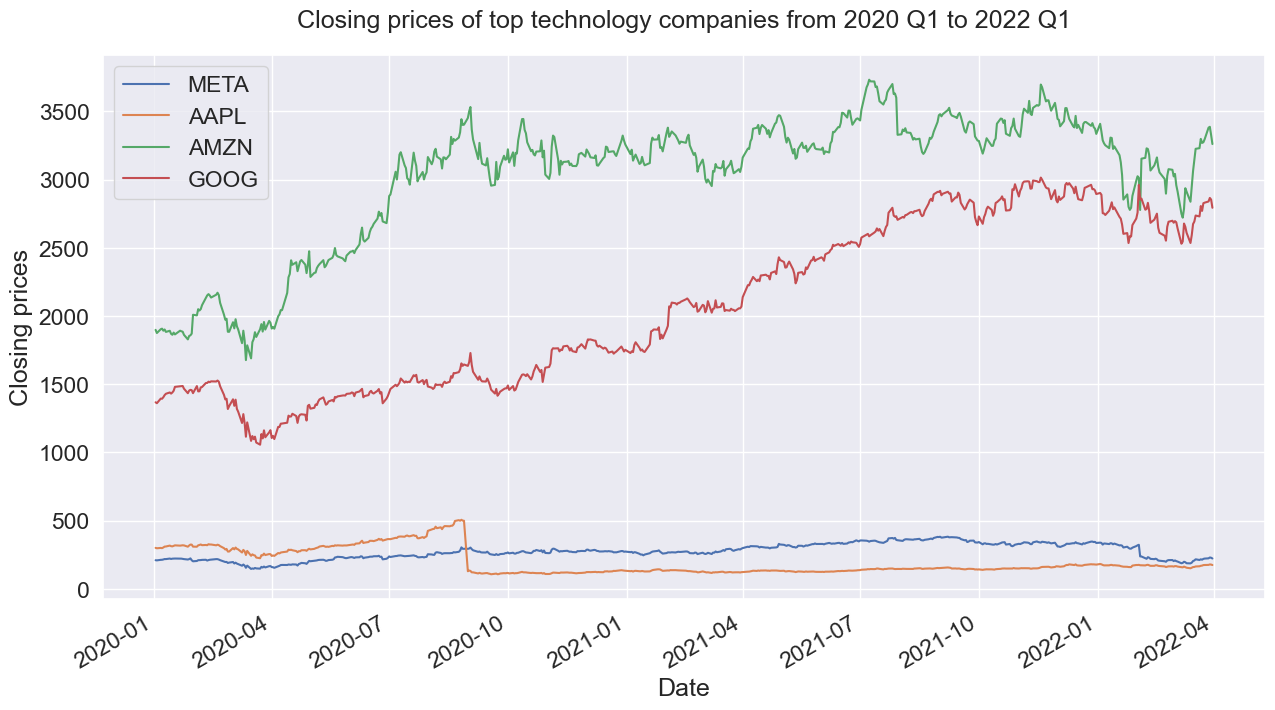

In [32]:
sns.set(rc={'figure.figsize':(15, 8)}, font_scale = 1.5)

closingprices.plot()

plt.xlabel('Date')
plt.ylabel('Closing prices')
plt.legend(labels = (tickers))
plt.title('Closing prices of top technology companies from 2020 Q1 to 2022 Q1', pad=20)

Overall, I observe some common trends among the four top technology companies:
- Mar 2020: All 4 companies showed a fall in stock prices which was possibly driven by the outbreak of COVID-19 worldwide. 
- Apr 2020 – Sep 2020: The stock prices of the companies slowly recovered since Apr 2020 but again dropped in Sep 2020. The reason financial markets continue to struggle was the concern about a possible recession, as interest rates rise to combat the world's high inflation.
- Feb 2022: There was also a major decline of stock closing prices, which was resulted by the Russian and Ukraine war.


Therefore, the closing stock prices of technology companies seemed to be negatively impacted by world events including the COVID-19 pandemic, recession as well as Russian and Ukraine war.

We can separate the lines by companies for clearer analysis of their stock prices in an individual level...

Text(0.5, 0.98, 'Closing prices of top technology companies from 2020 Q1 to 2022 Q1')

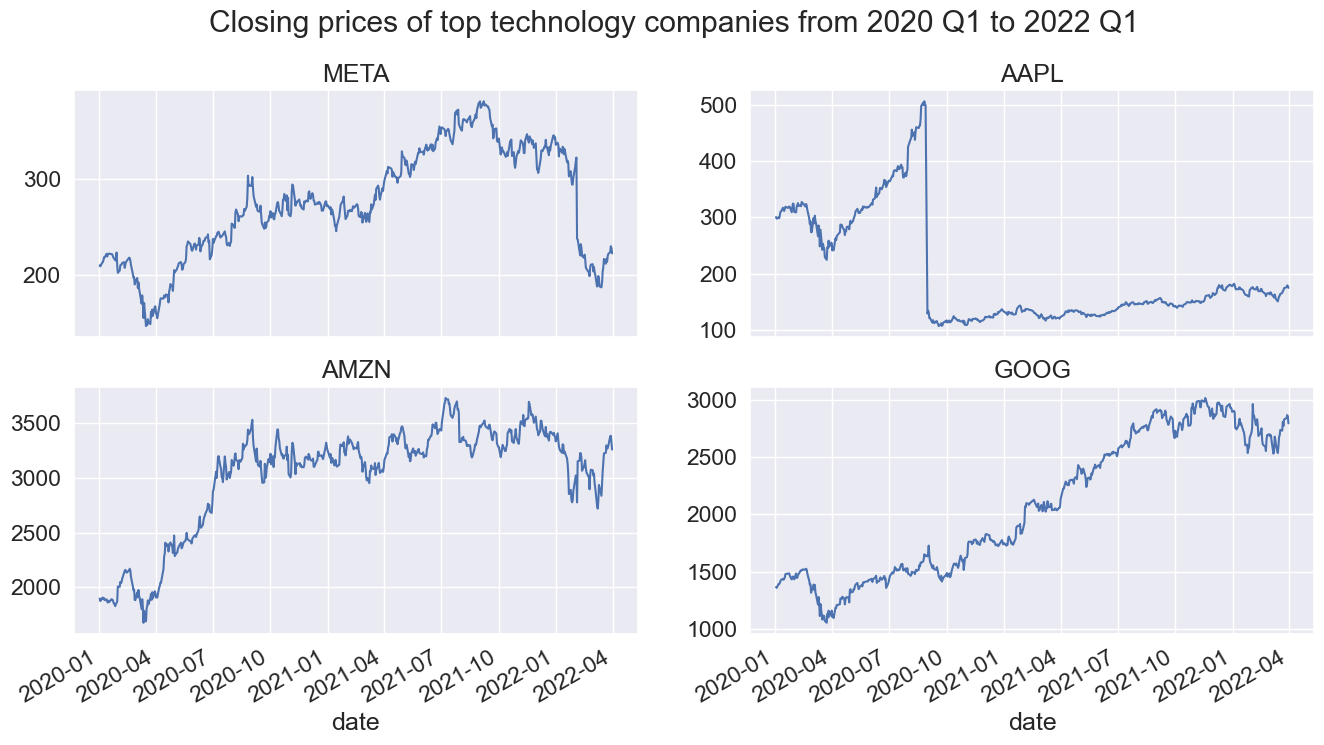

In [33]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,8))

meta['META_close'].plot(ax=axes[0, 0])
axes[0,0].set_title('META')

aapl['AAPL_close'].plot(ax=axes[0, 1])
axes[0,1].set_title('AAPL')

amzn['AMZN_close'].plot(ax=axes[1, 0])
axes[1,0].set_title('AMZN')

goog['GOOG_close'].plot(ax=axes[1, 1])
axes[1,1].set_title('GOOG')

fig.suptitle('Closing prices of top technology companies from 2020 Q1 to 2022 Q1')

Other than the world events accounted above, company-specific events also affected technology companies' stock prices.

GOOG:
Alphabet's stock prices showed a steady increase after the outbreak of pandemic in Mar 2020, but fluctuated from Oct 2021 to end of Mar 2022.
- Oct 2021: Alphabet's closing prices dipped as they reported that their earnings were below expectations.
- Feb 2022: Closing prices jumped in Feb 2022 after Alphabet announced that their profit increased 36 percent which was above analysts’ expectations.

AMZN:
Differed to other technology companies, Amazon’s stock prices surged after the outbreak of COVID-19 in Mar 2020.
- Mar 2020 to Sep 2020: Though the closing prices of all technology companies slowly recovered after the outbreak of COVID-19 in Mar 2020, the closing prices of Amazon seemed to show a larger growth during this period of time. This was due to Amazon’s profit soared brought by customers' increasing demand of online shopping due to lockdowns and health concerns during COVID-19.
- Mar 2022: Amazon’s closing prices increased as they announced their 20-for-1 split plans.

META:
Meta’s stock prices generally increased from Jan 2020 to Sep 2021, but dropped from Sep 2021 to the end of 2022 Q1. 
- Sep 2021: The drop of prices might be related to the announcement of the change of company name from Facebook to Meta and the metaverse project, making investors lose confidence in the company. 
- Feb 2022: There was also a crash of closing prices in Feb 2022 after Meta reported its first ever drop in daily user numbers. 

AAPL:
Similar to Meta, Apple’s stock prices grew from Jan 2020 to Sep 2021, but fell significantly in Sep 2021. 
- Sep 2020: There was a major decline of stock prices in Sep 2020. This is believed to be due to be the combined effects of people’s fear of recession and Apple's relatively underwhelming product launch event on 15 Sep 2020, when they announced new hardware and some updated software, but did not announce any new iPhones.
- Mar 2022: Apple’s stock prices grew in March 2022 which was driven by their product launch event, announcing a range of new iPhone and iPad products.

## Part 5: Correlation between stock prices of different companies
I then explore whether the closing prices of the 4 selected companies are correlated.

To do so, I first calculate the correlation coefficients between the closing prices of the technology companies in a separate dataframe `closingprices_cor_matrix`.

In [34]:
closingprices_cor_df = closingprices.rename(columns={'META_close':'META', 'AAPL_close':'AAPL', 'AMZN_close':'AMZN', 'GOOG_close':'GOOG'})
closingprices_cor_matrix = closingprices_cor_df.corr().round(2)
closingprices_cor_matrix

,META,AAPL,AMZN,GOOG
META,1.00,-0.50,0.81,0.75
AAPL,-0.50,1.00,-0.53,-0.54
AMZN,0.81,-0.53,1.00,0.70
GOOG,0.75,-0.54,0.70,1.00


After that, I plot a heatmap to better visualise the correlation.

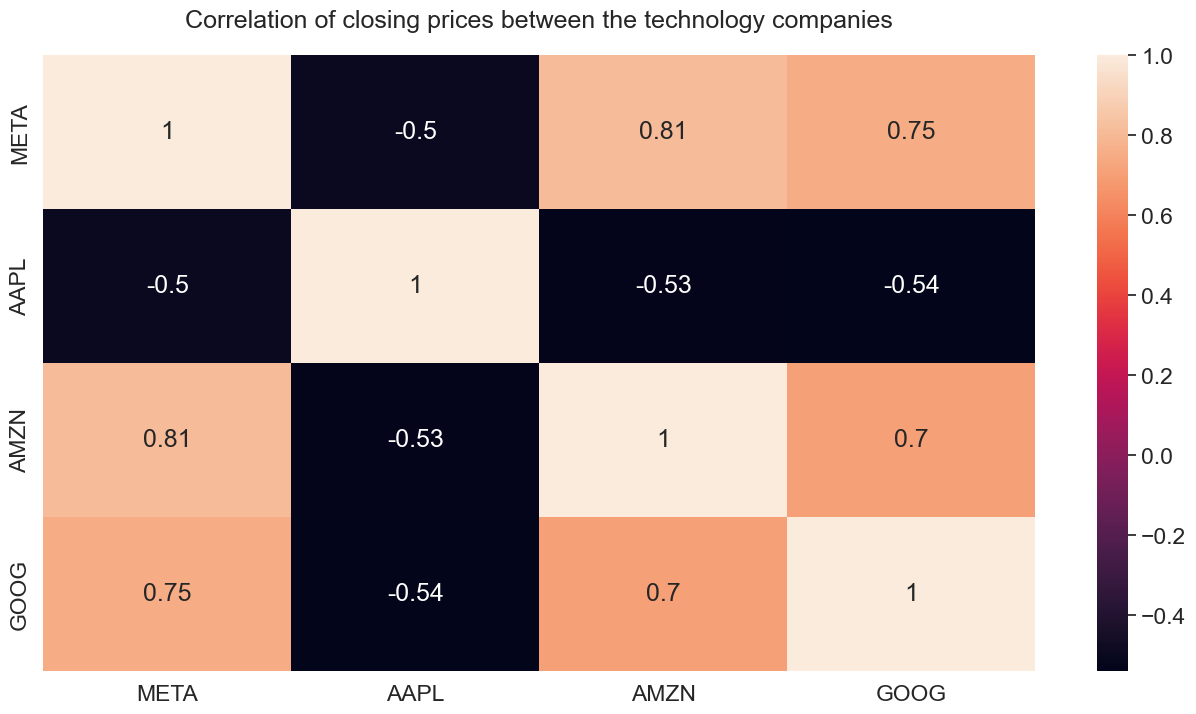

In [35]:
plt.figure(figsize = (16, 8))

sns.heatmap(data=closingprices_cor_matrix, annot=True)

plt.title('Correlation of closing prices between the technology companies', pad=20)
plt.show()

The closing prices of META and AMZN were most closely and positively correlated (_r_ = 0.81), followed by the closing prices between META and GOOG (_r_ = 0.75), then AMZN and GOOG (_r_ = 0.7). 

AAPL appeared to be least correlated with the other technology stocks, implying that AAPL might be more independent to the fluctuations of the other technology companies.


I then make a scatter plot to dive deeper into the correlation between Amazon and Meta closing prices.

Text(0.5, 1.0, 'Correlation of closing prices between AMZN and META')

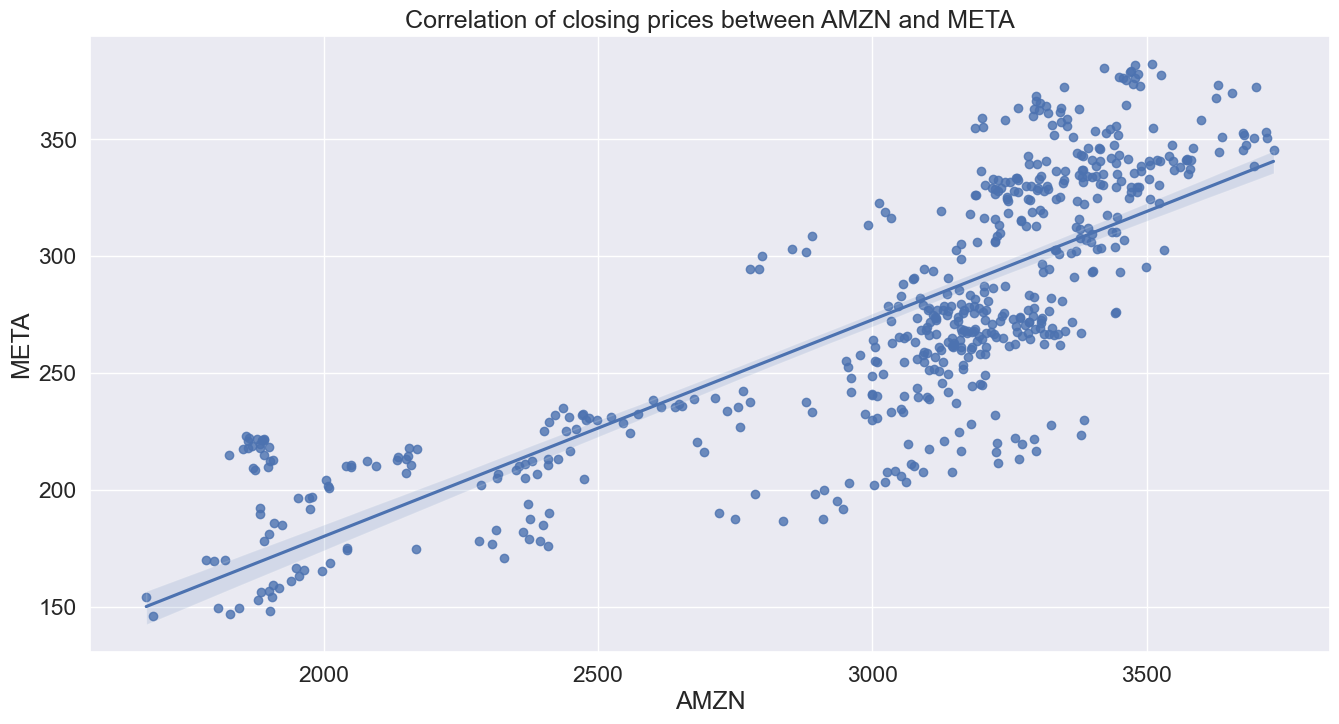

In [36]:
plt.figure(figsize = (16, 8))

sns.regplot(x=amzn['AMZN_close'], y=meta['META_close'])

plt.xlabel('AMZN')
plt.ylabel('META')
plt.title('Correlation of closing prices between AMZN and META')

This again suggests that when the closing prices of META increases, that of AMZN also increases.

## Part 6: Summary of findings
I analysed the stock price data of 4 top technology companies (including Meta, Apple, Amazon and Alphabet) from 1 Jan 2020 to 31 Mar 2022.
1. During this period of time, the stock prices of Meta and Amazon tended to drop in a daily basis, whereas that of Apple tended to grow daily.
2. The closing prices of the analysed technology companies increased for an average of 35%, with Alphabet (104.3% increase) showing the highest growth and Apple (41.9% decrease) showing the greatest decline.
3. The closing prices of the 4 companies analysed were negatively impacted by the COVID-19 pandemic, customers' fear of recession as well as the Russian and Ukraine war.
4. The closing prices of Amazon and Meta correlated the most, while Apple was least correlated with the other 3 companies.